# Project: Wrangling and Analyze Data
## Table of Contents
<ul>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#access"> Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#visual">Analyzing and Visualizing Data</a></li>
</ul>

In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import requests
import glob
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gather'></a>
## Gathering Data

In [2]:
#loading the data into tweet archive dataframe
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#using request library to get image prediction file
url ="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
#saving the file 
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
#loading the image prediction file into image dataframe
image = pd.read_csv('image-predictions.tsv', sep = '\t')

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
#opening the tweet json text as a file
df = []
with open('tweet-json.txt') as file:
    for line in file:
        df.append(json.loads(line))

In [6]:
#loading the file into retweets dataframe
retweets = pd.DataFrame(df,columns = ['id', 'retweet_count', 'favorite_count'])

<a id='access'></a>
## Assessing Data

In [7]:
#displaying the tweet archive table
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
#displaying the image table
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
#displaying the retweets table
retweets

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [10]:
#checking for null values and datatypes in the dataframe
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
#checking for five random rows in the dataframe
tweet_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2226,668274247790391296,NaN,NaN,2015-11-22 03:46:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sophie. Her son just got in the car to le...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668274247...,10,10,Sophie,None,None,None,None
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
2131,670086499208155136,NaN,NaN,2015-11-27 03:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hi yes this is dog. I can't help with that s-...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670086499...,10,10,None,None,None,None,None
772,776477788987613185,NaN,NaN,2016-09-15 17:48:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Huck. He's addicted to caffeine. Hope ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776477788...,11,10,Huck,None,None,pupper,None
386,826615380357632002,NaN,NaN,2017-02-01 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Please only send in dogs. We on...,8.099208e+17,4.196984e+09,2016-12-17 00:38:52 +0000,https://twitter.com/dog_rates/status/809920764...,10,10,None,None,None,None,None


In [12]:
#checking the unique values and their counts
tweet_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
#checking for duplicated tweet id
tweet_archive.tweet_id.duplicated().sum()

0

In [14]:
#checking for rows with rating numerator less than 10
tweet_archive.query('rating_numerator <= 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
113,870726314365509632,8.707262e+17,16487760.0,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
#checking for duplicated rows in the tweet archive table
tweet_archive.duplicated().sum()

0

In [16]:
#checking for nulls and datatypes in the image table columns
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#checking for duplicates in the image table
image.duplicated().sum()

0

In [18]:
#checking for nulls and datatypes in the image table columns
retweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Quality
##### `tweets_archive` table
- Wrong datatype for timestamp
- Nulls represented by none in name, doggo, floofer, pupper and puppo columns
- Repetitive +0000 in timestamp
- Values in rating numerator less than or way higher than 10
- some tweets were retweeted
- Missing values in in reply to status id and in reply to user id columns
- Repetitve words in source column
- Potential Typographical error in dog names (Jessiga, Petrick, Sampson, Clarq)
- Rows beyond August 1st, 2017 not needed
- Rating denominator is a constant 10 also the text and expanded url columns are not needed in the analysis 






##### `retweets` table
- id instead of tweet_id

#### Tidiness
- The three table should be in one dataframe
- In the text column the gender of the dog was indicated in tweet_archive table
- Doggo, floofer, pupper and puppo columns should be one coulmn
- The p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog column shoould be merge into two columns
- Original ratings with no image

<a id='clean'></a>
## Cleaning Data

In [19]:
#creating a copy of the unclean dataframes before cleaning
tweet_archive_clean = tweet_archive.copy()
image_clean = image.copy()
retweets_clean = retweets.copy()

### Quality
### Tweet_archive Table

### Issue 1
Nulls represented by none in name, doggo, floofer, pupper and puppo columns

#### Define
Replace the none values in with name, doggo, floofer, pupper and puppo columns NaN

#### Code

In [20]:
tweet_archive_clean[['name', 'doggo', 'floofer', 'pupper', 'puppo']] = tweet_archive_clean[['name', 'doggo', 'floofer', 'pupper', 'puppo']].replace('None', np.NaN)

#### Test

In [21]:
#checking the for none values in the columns
tweet_archive_clean.loc[:, ['name', 'doggo', 'floofer', 'pupper', 'puppo']].isin(['None'])

,name,doggo,floofer,pupper,puppo
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2351,False,False,False,False,False
2352,False,False,False,False,False
2353,False,False,False,False,False
2354,False,False,False,False,False


### Issue 2
Repetitive +0000 in timestamp

#### Define
Remove +0000 in the timestamp column

#### Code

In [22]:
tweet_archive_clean['timestamp'] = tweet_archive_clean['timestamp'].str.strip('+0')

#### Test

In [23]:
#checking for +0000 in the timestamp column
tweet_archive_clean['timestamp']

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
                ...         
2351    2015-11-16 00:24:50 
2352    2015-11-16 00:04:52 
2353    2015-11-15 23:21:54 
2354    2015-11-15 23:05:30 
2355    2015-11-15 22:32:08 
Name: timestamp, Length: 2356, dtype: object

### Issue 3
Wrong datatype for timestamp

#### Define
Change the timestamp datatype from string to datetime

#### Code

In [24]:
tweet_archive_clean['timestamp'] = pd.to_datetime(tweet_archive_clean['timestamp'])

#### Test

In [25]:
#checking the timestamp column datatype
tweet_archive_clean[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  2356 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.5 KB


### Issue 4
Values in ratings numerator less than or way higher than 10

#### Define
filter rows with rating numerator less than or way higher than  10 out


#### Code

In [26]:
tweet_archive_clean = tweet_archive_clean.query('20 > rating_numerator > 10')

#### Test

In [27]:
tweet_archive_clean.rating_numerator.value_counts()

12    558
11    464
13    351
14     54
15      2
17      1
Name: rating_numerator, dtype: int64

### Issue 5
Some tweets were retweeted 

#### Define
Drop rows with retweets and drop columns related to retweets

#### Code

In [28]:
#remove retweets by filtering out the rows with values in retweeted_status_id
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean['retweeted_status_id'].isnull()]
#remove the retweeted_status_id as the coulmn is empty
tweet_archive_clean = tweet_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ], axis = 1)

#### Test

In [29]:
#checking for the dropped columns
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 0 to 2339
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1278 non-null   int64         
 1   in_reply_to_status_id  54 non-null     float64       
 2   in_reply_to_user_id    54 non-null     float64       
 3   timestamp              1278 non-null   datetime64[ns]
 4   source                 1278 non-null   object        
 5   text                   1278 non-null   object        
 6   expanded_urls          1241 non-null   object        
 7   rating_numerator       1278 non-null   int64         
 8   rating_denominator     1278 non-null   int64         
 9   name                   896 non-null    object        
 10  doggo                  74 non-null     object        
 11  floofer                9 non-null      object        
 12  pupper                 140 non-null    object        
 13  pup

### Issue 6
Missing values in reply to status id and in reply to user id columns

##### Define
Drop  in reply to status id and in reply to user id columns in the tweets_archive

##### Code

In [30]:
tweet_archive_clean.drop(['in_reply_to_user_id', 'in_reply_to_status_id'], axis = 1, inplace = True)

##### Test

In [31]:
#checking for the dropped columns
tweet_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue 7
Repetitve words in source column

#### Define
Extract the specific word needed in the source column to a new column and drop the source column.


#### Code

In [32]:
specific_word = ['Twitter for iPhone', 'Vine - Make a Scene', 'Twitter Web Client', 'TweetDeck']
pat = '|'.join(r"\b{}\b".format(x) for x in specific_word)
tweet_archive_clean['sources'] = tweet_archive_clean['source'].str.findall(pat, flags=re.I).str.join(' ')
tweet_archive_clean.drop('source', axis = 1, inplace = True)

#### Test

In [33]:
#checking the values in the sources column
tweet_archive_clean.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,sources
342,832088576586297345,2017-02-16 04:45:50,@docmisterio account started on 11/15/15,NaN,11,15,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone
871,761599872357261312,2016-08-05 16:28:54,"This is Sephie. According to this picture, she...",https://twitter.com/dog_rates/status/761599872...,11,10,Sephie,NaN,NaN,NaN,NaN,Twitter for iPhone
240,846514051647705089,2017-03-28 00:07:32,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,NaN,NaN,NaN,Twitter for iPhone
437,820078625395449857,2017-01-14 01:22:35,I've never wanted to go to a camp more in my e...,https://twitter.com/dog_rates/status/820078625...,12,10,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone
396,825147591692263424,2017-01-28 01:04:51,This is Sweet Pea. She hides in shoe boxes and...,https://twitter.com/dog_rates/status/825147591...,13,10,Sweet,NaN,NaN,NaN,NaN,Twitter for iPhone


### Issue 8
Potential Typographical error in dog names (Jessiga, Petrick, Sampson, Clarq)

#### Define
Replace (Jessiga, Fwed, Sampson, Josep, Joshwa, Shawwn, Pertrick, Franq, clarq, Johm, Hemry) with (Jessica, Fred, Samson, Joseph, Joshua, Shawn, Patrick, Frank, Clara, John, Henry). I may be wrong about this but I assume these names were not correctly spelt

#### Code


In [34]:
tweet_archive_clean['name'] = tweet_archive_clean['name'].replace(['Jessiga', 'Fwed', 'Sampson', 'Josep', 'Joshwa', 'Shawwn', 'Pertrick', 'Franq', 'Clarq', 'Johm', 'Hemry'],['Jessica', 'Fred', 'Samson', 'Joseph', 'Joshua', 'Shawn', 'Patrick', 'Frank', 'Clara', 'John', 'Henry'])

#### Test

In [35]:
#checking the names column for the misspelt names
names = ['Jessiga', 'Fwed', 'Sampson', 'Josep', 'Joshwa', 'Shawwn', 'Pertrick', 'Franq', 'Clarq', 'Johm', 'Hemry']
tweet_archive_clean['name'].isin(names).value_counts()

False    1278
Name: name, dtype: int64

### Issue 9
Rows beyond August 1st, 2017 not needed

#### Define 
Drop rows with timestamp beyond August 1st, 2017

#### Code

In [36]:
tweet_archive_clean = tweet_archive_clean[(tweet_archive_clean['timestamp'] <= '2017-08-01 00:00:00') & (tweet_archive_clean['timestamp'] >=  '2015-11-16 03:55:00')]

#### Test

In [37]:
#checking for the latest date
tweet_archive_clean['timestamp'].max()

Timestamp('2017-07-31 00:18:03')

### Retweets Table
### Issue 1
id instead of tweet_id


#### Define
Change id in the retweets table to tweet id 

#### Code

In [38]:
retweets_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

#### Test

In [39]:
#checking for the names of the columns 
retweets_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Tidiness


### Issue 1
The three table should be in one dataframe

##### Define
Merge the three tables into one dataframe

##### Code

In [40]:
tweet_archive_clean = tweet_archive_clean.merge(image_clean, on = 'tweet_id', how = 'left').merge(retweets_clean, on = 'tweet_id', how = 'left')

##### Test

In [41]:
#chceking for new dataframe for column names
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1276 non-null   int64         
 1   timestamp           1276 non-null   datetime64[ns]
 2   text                1276 non-null   object        
 3   expanded_urls       1239 non-null   object        
 4   rating_numerator    1276 non-null   int64         
 5   rating_denominator  1276 non-null   int64         
 6   name                894 non-null    object        
 7   doggo               74 non-null     object        
 8   floofer             9 non-null      object        
 9   pupper              140 non-null    object        
 10  puppo               21 non-null     object        
 11  sources             1276 non-null   object        
 12  jpg_url             1140 non-null   object        
 13  img_num             1140 non-null   float64     

### Issue 2
In the text column the gender of the dog was indicated in tweet_archive table

#### Define

Extract the gender of the dogs to a new column from text column

#### Code

In [42]:
#extract he and she from the text column to a new column called gender
gen = ['he', 'she']
word = '|'.join(r"\b{}\b".format(x) for x in gen)
tweet_archive_clean['gender'] = tweet_archive_clean['text'].str.extract('('+ word + ')', expand=False, flags=re.I)
#changing the gender column  values to lower case
tweet_archive_clean['gender'] = tweet_archive_clean['gender'].str.lower()
#replace he and she with male and female respectfully
tweet_archive_clean['gender'] = tweet_archive_clean['gender'].replace(['he', 'she'], ['Male', 'Female'])

#### Test

In [43]:
tweet_archive_clean.gender.value_counts()

Male      577
Female    225
Name: gender, dtype: int64

### Issue 3
Rating denominator  column is a constant 10 also expanded url column it is not useful in our analysis

#### Define
Dropping rating denominator and expanded urls columns

#### Code

In [44]:
tweet_archive_clean.drop(['rating_denominator', 'expanded_urls'], axis = 1, inplace = True)

#### Test

In [45]:
#checking for column names
list(tweet_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'sources',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'gender']

### Issue 4
Doggo, floofer, pupper and puppo columns should be one coulmn

#### Define
Doggo, floofer, pupper and puppo columns should be merged into one coulmn

#### Code

In [46]:
#merging the four columns into dog stage column
tweet_archive_clean['dog_stage'] = tweet_archive_clean[tweet_archive_clean.columns[5:8]].apply(lambda x: '-'.join(x.dropna().astype(str)), axis=1)
#dropping the columns
tweet_archive_clean = tweet_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)
#replacing empty rows in the dog stage column with nan
tweet_archive_clean['dog_stage'] = tweet_archive_clean['dog_stage'].replace('', np.NaN)

#### Test

In [47]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1276 non-null   int64         
 1   timestamp         1276 non-null   datetime64[ns]
 2   text              1276 non-null   object        
 3   rating_numerator  1276 non-null   int64         
 4   name              894 non-null    object        
 5   sources           1276 non-null   object        
 6   jpg_url           1140 non-null   object        
 7   img_num           1140 non-null   float64       
 8   p1                1140 non-null   object        
 9   p1_conf           1140 non-null   float64       
 10  p1_dog            1140 non-null   object        
 11  p2                1140 non-null   object        
 12  p2_conf           1140 non-null   float64       
 13  p2_dog            1140 non-null   object        
 14  p3                1140 n

### Issue 5
original ratings with no image

#### Define
Drop rows with null values in jpg_url

#### Code

In [48]:
tweet_archive_clean = tweet_archive_clean.dropna(subset = ['jpg_url'])

#### Test

In [49]:
#checking for null values in jpg_url column
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 0 to 1275
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1140 non-null   int64         
 1   timestamp         1140 non-null   datetime64[ns]
 2   text              1140 non-null   object        
 3   rating_numerator  1140 non-null   int64         
 4   name              855 non-null    object        
 5   sources           1140 non-null   object        
 6   jpg_url           1140 non-null   object        
 7   img_num           1140 non-null   float64       
 8   p1                1140 non-null   object        
 9   p1_conf           1140 non-null   float64       
 10  p1_dog            1140 non-null   object        
 11  p2                1140 non-null   object        
 12  p2_conf           1140 non-null   float64       
 13  p2_dog            1140 non-null   object        
 14  p3                1140 n

#### Code

In [50]:
prediction = []
conf = []
#utility function
def prediction_confidence(df):
    """
    Determine the  algorithm's prediction and algorithm's confidence
    Args:
       df (pandas.core.DataFrame) - pandas dataframe containing alogrithm's prediction and confidence in different columns
    Returns:
       nan, alogrithm's prediction and algorithm's confidence
    """
    if df['p1_dog'] == True:
        prediction.append(df['p1'])
        conf.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        prediction.append(df['p2'])
        conf.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        prediction.append(df['p3'])
        conf.append(df['p3_conf'])
    else:
        prediction.append('')
        conf.append(0)
# adding prediction and confidence to the tweet_archive_clean dataframe
tweet_archive_clean.apply(prediction_confidence, axis = 1)
tweet_archive_clean['breed_prediction'] = prediction
tweet_archive_clean['confidence'] = conf
#dropping the image prediction columns
tweet_archive_clean = tweet_archive_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)
#replacing the empty rows in the breed prediction columns with nan
tweet_archive_clean['breed_prediction'] = tweet_archive_clean['breed_prediction'].replace('', np.NaN)

#### Test

In [51]:
tweet_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator', 'name', 'sources',
       'jpg_url', 'img_num', 'retweet_count', 'favorite_count', 'gender',
       'dog_stage', 'breed_prediction', 'confidence'],
      dtype='object')

<a id='store'></a>
## Storing Data

In [52]:
#storing clean data in a new csv file
tweet_archive_clean.to_csv('twitter_archive_master.csv', index = False)

<a id='visual'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. I produced **three (3) insights and one (1) visualization.**

In [53]:
#displaying the top 10 retweet count
retweets_count = tweet_archive_clean.sort_values('retweet_count', axis = 0, ascending = False)
top_retweets = retweets_count.iloc[:11, :]
top_retweets

,tweet_id,timestamp,text,rating_numerator,name,sources,jpg_url,img_num,retweet_count,favorite_count,gender,dog_stage,breed_prediction,confidence
741,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13,NaN,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,79515,131075,NaN,doggo,Labrador_retriever,0.825333
422,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13,Stephan,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1.0,56625,107015,Male,NaN,Chihuahua,0.505370
760,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,13,NaN,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1.0,52360,75163,NaN,doggo,Eskimo_dog,0.503372
331,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13,NaN,Twitter for iPhone,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,48265,132810,NaN,NaN,Lakeland_terrier,0.196015
60,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,13,Duddles,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,45849,107956,Male,NaN,English_springer,0.383404
355,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14,Bo,Twitter for iPhone,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1.0,42228,95450,Male,doggo,standard_poodle,0.351308
424,806629075125202948,2016-12-07 22:38:52,"""Good afternoon class today we're going to lea...",13,NaN,Twitter for iPhone,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2.0,37911,75639,NaN,NaN,cocker_spaniel,0.046403
115,866450705531457537,2017-05-22 00:28:40,This is Jamesy. He gives a kiss to every other...,13,Jamesy,Twitter for iPhone,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2.0,32883,106827,Male,pupper,French_bulldog,0.905334
362,817827839487737858,2017-01-07 20:18:46,This is Buddy. He ran into a glass door once. ...,13,Buddy,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1.0,31314,57622,Male,NaN,cocker_spaniel,0.387608
1104,678399652199309312,2015-12-20 02:20:55,This made my day. 12/10 please enjoy https://t...,12,NaN,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1.0,30742,61794,NaN,NaN,Bedlington_terrier,0.015047


In [54]:
#displaying value counts for the dog breeds
tweet_archive_clean['breed_prediction'].value_counts()[:16]

golden_retriever            123
Pembroke                     78
Labrador_retriever           74
Chihuahua                    48
chow                         37
toy_poodle                   37
Samoyed                      35
Pomeranian                   28
pug                          25
cocker_spaniel               22
French_bulldog               21
malamute                     19
Eskimo_dog                   15
Chesapeake_Bay_retriever     15
Cardigan                     15
Siberian_husky               14
Name: breed_prediction, dtype: int64

In [55]:
#diplaying value count for the gender of the dog
tweet_archive_clean['gender'].value_counts()

Male      540
Female    216
Name: gender, dtype: int64

In [56]:
#displaying value count for the dog stages
tweet_archive_clean['dog_stage'].value_counts()

pupper           116
doggo             55
doggo-pupper       7
floofer            6
doggo-floofer      1
Name: dog_stage, dtype: int64

In [57]:
#displaying the top 10 favorite counts
fav_count = tweet_archive_clean.sort_values('favorite_count', axis = 0, ascending = False)
fav_10 = fav_count.iloc[:11, :]
fav_10

,tweet_id,timestamp,text,rating_numerator,name,sources,jpg_url,img_num,retweet_count,favorite_count,gender,dog_stage,breed_prediction,confidence
331,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13,NaN,Twitter for iPhone,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,48265,132810,NaN,NaN,Lakeland_terrier,0.196015
741,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13,NaN,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,79515,131075,NaN,doggo,Labrador_retriever,0.825333
60,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,13,Duddles,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,45849,107956,Male,NaN,English_springer,0.383404
422,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13,Stephan,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1.0,56625,107015,Male,NaN,Chihuahua,0.505370
115,866450705531457537,2017-05-22 00:28:40,This is Jamesy. He gives a kiss to every other...,13,Jamesy,Twitter for iPhone,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2.0,32883,106827,Male,pupper,French_bulldog,0.905334
355,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14,Bo,Twitter for iPhone,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1.0,42228,95450,Male,doggo,standard_poodle,0.351308
99,870374049280663552,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,13,Zoey,Twitter for iPhone,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1.0,27680,85011,Female,NaN,golden_retriever,0.841001
424,806629075125202948,2016-12-07 22:38:52,"""Good afternoon class today we're going to lea...",13,NaN,Twitter for iPhone,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2.0,37911,75639,NaN,NaN,cocker_spaniel,0.046403
143,859196978902773760,2017-05-02 00:04:57,We only rate dogs. This is quite clearly a smo...,12,quite,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1.0,25661,75193,NaN,NaN,malamute,0.216163
760,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,13,NaN,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1.0,52360,75163,NaN,doggo,Eskimo_dog,0.503372


In [58]:
#displaying value counts for the sources of tweet
tweet_archive_clean.sources.value_counts()

Twitter for iPhone     1118
Twitter Web Client       15
tweetdeck TweetDeck       7
Name: sources, dtype: int64

In [59]:
#displaying the mean rating of the dogs
tweet_archive_clean.rating_numerator.mean()

11.94122807017544

### Insights:

1. It can be seen that the tweet id number of 744234799360020481 of breed Labrador retriever has the most retweet count of 79515	and favorite count of 131075	

2. It can be seen that golden retriever is the most popular dog breed

3. It can be see that most of the dogs were male

4. It can be seen that pupper is the most popular dog stage

5. It can be seen that the tweet id number of 822872901745569793 of breed Lakeland terrier	and dog stage puppo has the most retweet count of 48265	and favorite count of 132810

6. The most popular source of tweet was Twitter for iphone

7. The mean rating is 12

## Visualization

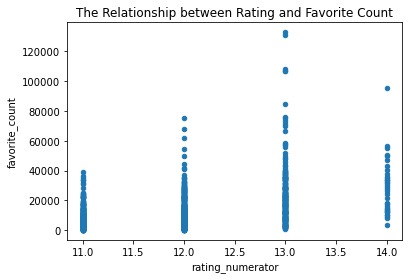

In [60]:
#displaying the Relationship between Rating and Favorite Count
tweet_archive_clean.plot.scatter(x='rating_numerator', y='favorite_count')
plt.title('The Relationship between Rating and Favorite Count')
plt.show()

It can be seen that there is an increase in favorite count with increase in rating numerator and the most popular rating is 13

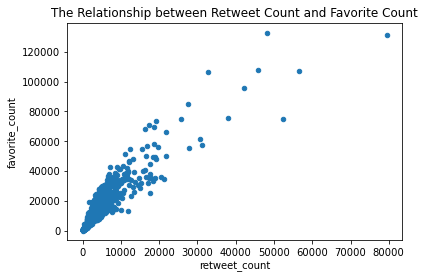

In [61]:
#displaying the Relationship between Retweet Count and Favorite Count
tweet_archive_clean.plot.scatter(x='retweet_count', y='favorite_count')
plt.title('The Relationship between Retweet Count and Favorite Count')
plt.show()

it can be seen that there is a positive correlation between retweet counts and favorite count

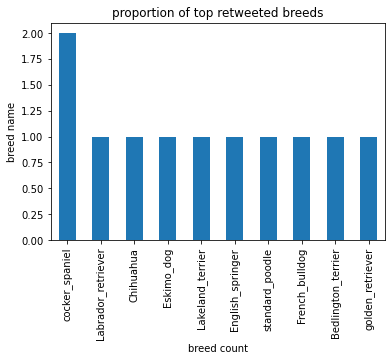

In [62]:
#displaying the proportion of top retweeted breeds
top_retweets['breed_prediction'].value_counts().plot.bar()
plt.xlabel('breed count')
plt.ylabel('breed name')
plt.title('proportion of top retweeted breeds')
plt.show()

it can be seen that cocker spaniel is the most retweeted breed

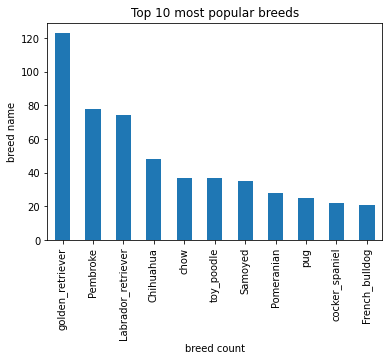

In [63]:
#displaying the top 10 most popular breeds
tweet_archive_clean['breed_prediction'].value_counts()[:11].plot.bar()
plt.xlabel('breed count')
plt.ylabel('breed name')
plt.title('Top 10 most popular breeds')
plt.show()

it can be seen that Golden retriever is the most popular breed of the dogs

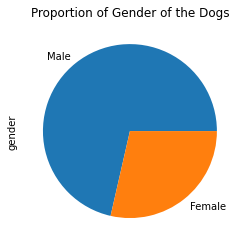

In [64]:
#displaying the proportion of Gender of the Dogs
tweet_archive_clean['gender'].value_counts().plot.pie()
plt.title('Proportion of Gender of the Dogs')
plt.show()

It can be seen that there are more male dogs than female dogs

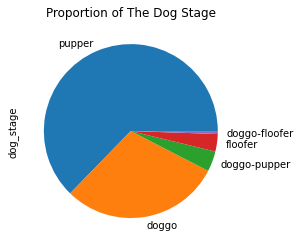

In [65]:
#displaying the proportion of The Dog Stage
tweet_archive_clean['dog_stage'].value_counts().plot.pie()
plt.title('Proportion of The Dog Stage')
plt.show()

it can be seen that the most popuplar dog stage is pupper